In [34]:
#Supressign warnings and importing Libraries

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)\

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import seaborn as sns

In [3]:
#Inspecting Data
df = pd.read_csv('./data/test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# checking missing values, data types, shape of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [5]:
# check the dimension of the data
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns.')

The data has 367 rows and 12 columns.


In [6]:
#Checkingfor missing data in our csv file
missing_values = (
    df.isnull().sum()/len(df)*100
).round(0).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values.round(2)

Column			% missing
-----------------------------------


Loan_ID              0
Gender               3
Married              0
Dependents           3
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
dtype: int32

In [7]:
#Handling missing values
#person_features = ['Gender', 'Dependants', 'Self_Employed']
#person_df = df[person_features]
#person_df
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Cleaning the data

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
# removing missing values with rows
df.dropna(subset=['Gender'], inplace = True)

In [10]:
# Empty = no (dependants)
df['Dependents'].fillna(0, inplace = True)

In [11]:
# Default empty to no (Self_Employed)
df['Self_Employed'].fillna('No', inplace = True)


In [12]:
# Replace the empty values with the mean (loan_anmount)
x = df["LoanAmount"].mean()
df["LoanAmount"].fillna(x, inplace = True)

In [13]:
# replace the empty values with the maximum loan term (loan_amount_term) 
x = df["Loan_Amount_Term"].max()
df["Loan_Amount_Term"].fillna(x, inplace = True)



In [14]:
# replace empty values with 0 (Credit_History)
df['Credit_History'].fillna(0, inplace = True)


Dealing with duplicates

In [15]:
df.duplicated().sum()

0

Outliers

In [30]:
Credit_status = ['ApplicantIncome', 'LoanAmount']
Amount_df = df[Credit_status]
Amount_df


fig = px.box(
    data_frame=Amount_df, 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (ApplicantIncome) - With Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

In [28]:
Amount_df[Amount_df['ApplicantIncome'] < 30_000]

,ApplicantIncome,LoanAmount
0,5720,110.0
1,3076,126.0
2,5000,208.0
3,2340,100.0
4,3276,78.0
...,...,...
362,4009,113.0
363,4158,115.0
364,3250,126.0
365,5000,158.0


In [32]:
mask_price = Amount_df['ApplicantIncome'] < 8_000

fig = px.box(
    data_frame=Amount_df[mask_price], 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (ApplicantIncome) - Without Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

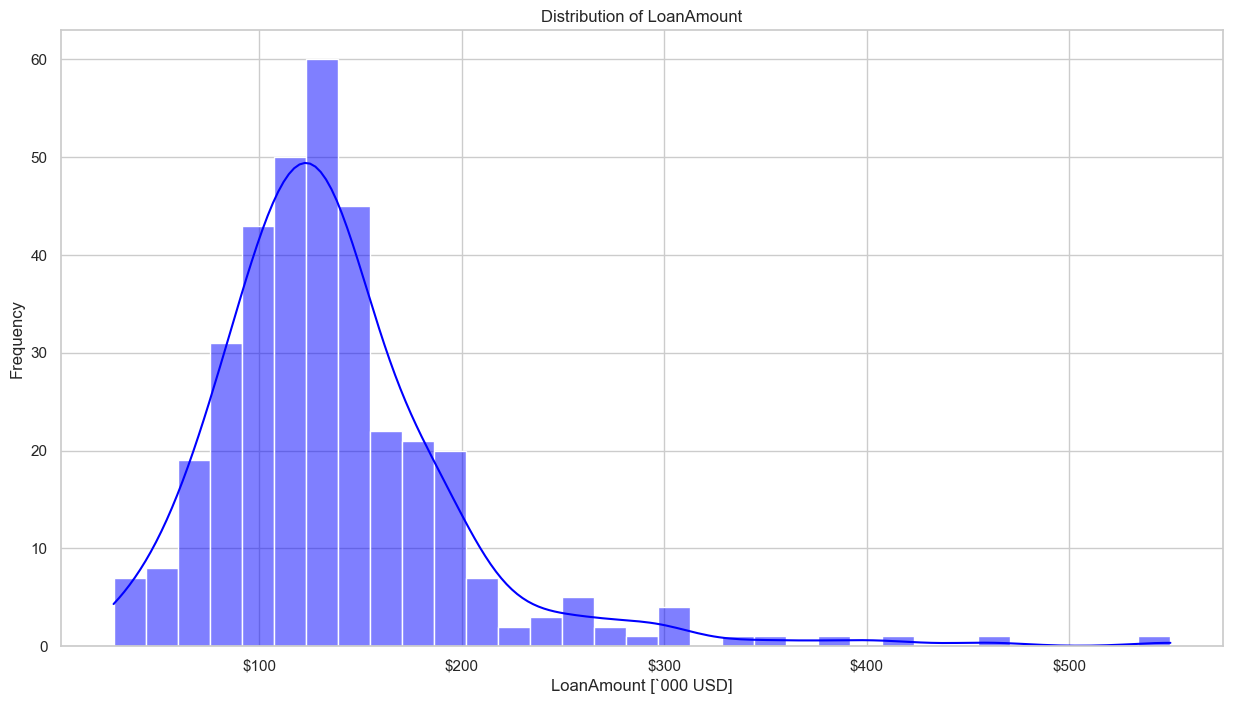

In [38]:
# Create a distribution plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.histplot(df["LoanAmount"], kde=True, color="blue")

# Adding labels and title
plt.xlabel("LoanAmount [`000 USD]")
plt.ylabel("Frequency")
plt.title("Distribution of LoanAmount")

# Format x-axis labels to display prices in "$100,000" format (BONUS)
def price_formatter(x, pos):
    return f"${int(x/1):}"

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))

plt.show()